In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = 'flowers3/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
print(len(os.listdir(train_dir+'/daisy')) + len(os.listdir(test_dir+'/daisy')) + len(os.listdir(validation_dir+'/daisy')))
print(len(os.listdir(train_dir+'/dandelion')) + len(os.listdir(test_dir+'/dandelion')) + len(os.listdir(validation_dir+'/dandelion')))
print(len(os.listdir(train_dir+'/rose')) + len(os.listdir(test_dir+'/rose')) + len(os.listdir(validation_dir+'/rose')))
print(len(os.listdir(train_dir+'/sunflower')) + len(os.listdir(test_dir+'/sunflower')) + len(os.listdir(validation_dir+'/sunflower')))
print(len(os.listdir(train_dir+'/tulip')) + len(os.listdir(test_dir+'/tulip')) + len(os.listdir(validation_dir+'/tulip')))

769
1052
784
734
984


In [4]:
img_h = 64
img_w = 64
img_col = 3

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_directory(train_dir, target_size=(img_h, img_w),batch_size=32, class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(validation_dir,target_size=(img_h, img_w), batch_size=32, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,target_size=(img_h, img_w), batch_size=32, class_mode='categorical')

Found 3025 images belonging to 5 classes.
Found 649 images belonging to 5 classes.
Found 649 images belonging to 5 classes.


In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[img_h, img_w, img_col]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [9]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model = cnn.fit(x=training_set, validation_data=val_set, epochs=100)

Epoch 1/100
95/95 [==============================] - 20s 165ms/step - loss: 1.4230 - accuracy: 0.3987 - val_loss: 1.1513 - val_accuracy: 0.5624
Epoch 2/100
95/95 [==============================] - 6s 58ms/step - loss: 1.1654 - accuracy: 0.5332 - val_loss: 1.0055 - val_accuracy: 0.5763
Epoch 3/100
95/95 [==============================] - 6s 59ms/step - loss: 1.0515 - accuracy: 0.5950 - val_loss: 0.9508 - val_accuracy: 0.6271
Epoch 4/100
95/95 [==============================] - 6s 59ms/step - loss: 0.9827 - accuracy: 0.6212 - val_loss: 1.0683 - val_accuracy: 0.6055
Epoch 5/100
95/95 [==============================] - 6s 59ms/step - loss: 0.9244 - accuracy: 0.6420 - val_loss: 0.8341 - val_accuracy: 0.6810
Epoch 6/100
95/95 [==============================] - 6s 58ms/step - loss: 0.8616 - accuracy: 0.6734 - val_loss: 0.8290 - val_accuracy: 0.6764
Epoch 7/100
95/95 [==============================] - 6s 58ms/step - loss: 0.8292 - accuracy: 0.6856 - val_loss: 0.8392 - val_accuracy: 0.6888
Epoc

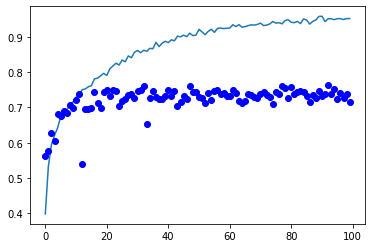

In [23]:
plt.plot(model.history['accuracy'], label='Training acc')
plt.plot(model.history['val_accuracy'], 'bo', label='Validation acc')


In [24]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [26]:
test_loss, test_acc = cnn.evaluate(test_set)

21/21 [==============================] - 3s 127ms/step - loss: 2.3333 - accuracy: 0.6903


In [27]:
print(test_acc)

0.6902927756309509
